# 标量、向量、矩阵的求导

作者：Wanying 
日期: 2025年1月


## 1. 导数的概念回顾

先来回顾一下导数的基本概念。导数描述了函数值的变化率。对于函数 $f(x)$,其导数 $f'(x)$ 的几何意义是函数曲线在点 $(x,f(x))$ 处的切线斜率。

举个简单的例子,假设函数为:
$$f(x) = x^2$$

其导数为:  
$$f'(x) = 2x$$

在 $x=1$ 处,导数 $f'(1) = 2$,表示当 $x$ 在 1 附近变化时,$f(x)$ 的变化率是 2。

导数在求解函数的极值点时非常有用。例如对于上面这个二次函数,我们令 $f'(x)=0$ 即可求得极值点为 $x=0$。

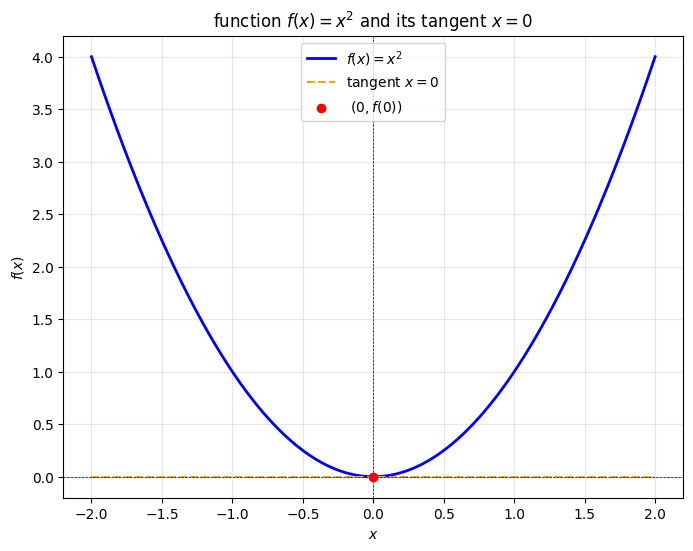

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数及其导数
def f(x):
    return x**2

def f_prime(x):
    return 2 * x

# 定义绘图范围
x = np.linspace(-2, 2, 500)  # 从 -2 到 2，取 500 个点
y = f(x)

# 计算导数在 x=0 处的值
x_tangent = 0
y_tangent = f(x_tangent)
slope = f_prime(x_tangent)

# 定义切线方程 y = slope * (x - x_tangent) + y_tangent
tangent_line = slope * (x - x_tangent) + y_tangent

# 绘制函数图像和切线
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r"$f(x) = x^2$", color="blue", linewidth=2)
plt.plot(x, tangent_line, label=r"tangent $x=0$", color="orange", linestyle="--")
plt.scatter([x_tangent], [y_tangent], color="red", label=r" $(0, f(0))$", zorder=5)

# 添加图例和其他信息
plt.title("function $f(x) = x^2$ and its tangent $x=0$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.legend()
plt.grid(alpha=0.3)

# 显示图像
plt.show()


## 2. 矩阵及其基本运算

回顾一些矩阵的基础知识。

矩阵是一个按照长方阵列排列的复数或实数集合。矩阵的形状(shape)由其行数和列数决定,例如 $m \times n$ 矩阵就是有 $m$ 行 $n$ 列的矩阵。
- 矩阵加法:行列数相同的矩阵可以相加,加法规则是对应位置的元素相加。

$$\begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix} + 
\begin{bmatrix}
5 & 6\\  
7 & 8
\end{bmatrix} =
\begin{bmatrix}
6 & 8\\
10 & 12
\end{bmatrix}$$

- 矩阵数乘:矩阵可以与标量相乘,其结果是矩阵的每个元素都乘以该标量。

$$2 \times \begin{bmatrix}
1 & 2\\ 
3 & 4
\end{bmatrix} =
\begin{bmatrix}
2 & 4\\
6 & 8  
\end{bmatrix}$$

- 矩阵乘法:两个矩阵可以相乘,前提是第一个矩阵的列数等于第二个矩阵的行数。设 $\mathbf{A}$ 为 $m \times n$ 矩阵,$\mathbf{B}$ 为 $n \times p$ 矩阵,则它们的乘积 $\mathbf{C} = \mathbf{A}\mathbf{B}$ 为 $m \times p$ 矩阵,其中第 $i$ 行第 $j$ 列的元素为 $\mathbf{A}$ 的第 $i$ 行与 $\mathbf{B}$ 的第 $j$ 列对应元素乘积之和,即:

$$c_{ij} = \sum_{k=1}^n a_{ik}b_{kj}$$  

- 矩阵转置:将矩阵的行列互换得到其转置矩阵,记作 $\mathbf{A}^T$。
  
$$\mathbf{A} = \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{bmatrix}, \quad
\mathbf{A}^T = \begin{bmatrix}
1 & 4\\
2 & 5\\ 
3 & 6
\end{bmatrix}$$

- 矩阵求逆:方阵 $\mathbf{A}$ 的逆矩阵记作 $\mathbf{A}^{-1}$,满足:
    
$$\mathbf{A}\mathbf{A}^{-1} = \mathbf{A}^{-1}\mathbf{A} = \mathbf{I}$$

并非所有方阵都有逆矩阵,有逆矩阵的方阵称为可逆矩阵或非奇异矩阵。


## 3. 矩阵求导的布局

在讨论矩阵求导时,我们需要先定义求导结果的布局。常用的有两种布局方式:分子布局(numerator layout)和分母布局(denominator layout)。


- 分母布局:若标量函数 $f(\mathbf{x})$ 对列向量 $\mathbf{x}$ 求导,其结果也为列向量,维度与 $\mathbf{x}$ 一致。按照分母布局,导数记作:

$$\frac{\partial f}{\partial \mathbf{x}} = \begin{bmatrix}
\frac{\partial f}{\partial x_1}\\
\frac{\partial f}{\partial x_2}\\
\vdots\\
\frac{\partial f}{\partial x_n}
\end{bmatrix}$$


- 分子布局:按照分子布局,上述导数应记作:

$$\left(\frac{\partial f}{\partial \mathbf{x}}\right)^T = \begin{bmatrix}
\frac{\partial f}{\partial x_1} & \frac{\partial f}{\partial x_2} & \cdots & \frac{\partial f}{\partial x_n}  
\end{bmatrix}$$

接下来我们主要使用分母布局。在阅读其他教程时,一定要注意其所采用的布局方式。


## 4. 标量对向量求导

假设标量函数 $f(\mathbf{x})$ 的自变量为 $n$ 维列向量:
$$\mathbf{x} = \begin{bmatrix}
x_1\\ 
x_2\\
\vdots\\
x_n
\end{bmatrix}$$

则 $f(\mathbf{x})$ 对 $\mathbf{x}$ 的导数为:

$$\frac{\partial f}{\partial \mathbf{x}} = \begin{bmatrix}
\frac{\partial f}{\partial x_1}\\
\frac{\partial f}{\partial x_2}\\
\vdots\\
\frac{\partial f}{\partial x_n}  
\end{bmatrix}$$

例如,设
$$f(\mathbf{x}) = x_1^2 + x_2^2, \quad \mathbf{x} = \begin{bmatrix}
x_1\\ 
x_2
\end{bmatrix}$$

则

$$\frac{\partial f}{\partial \mathbf{x}} = \begin{bmatrix}
2x_1\\
2x_2
\end{bmatrix}$$


## 5. 矩阵对向量求导

接下来讨论将矩阵函数对向量求导。设 $n$ 维向量值函数为:

$$\mathbf{f}(\mathbf{x}) = \begin{bmatrix}
f_1(\mathbf{x})\\
f_2(\mathbf{x})\\
\vdots\\ 
f_n(\mathbf{x})
\end{bmatrix}$$

其中自变量 $\mathbf{x}$ 为 $m$ 维列向量。则 $\mathbf{f}$ 对 $\mathbf{x}$ 的导数(Jacobian矩阵)定义为:

$$\frac{\partial \mathbf{f}}{\partial \mathbf{x}} = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_m}\\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_m}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \cdots & \frac{\partial f_n}{\partial x_m}
\end{bmatrix}$$

例如,对于向量函数:

$$
\mathbf{f}(\mathbf{x}) = \begin{bmatrix}
f_1(\mathbf{x})\\
f_2(\mathbf{x})
\end{bmatrix} = \begin{bmatrix}
x_1^2 + x_2^2\\
x_1x_2 + x_3
\end{bmatrix},
$$

以及向量变量：

$$
\mathbf{x} = \begin{bmatrix}
x_1\\
x_2\\
x_3
\end{bmatrix}.
$$

目标是计算该向量函数的 **Jacobian 矩阵**。Jacobian 矩阵的定义是：

$$
\frac{\partial \mathbf{f}}{\partial \mathbf{x}} = 
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \frac{\partial f_1}{\partial x_3} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \frac{\partial f_2}{\partial x_3}
\end{bmatrix}.
$$

这里，$\mathbf{f}(\mathbf{x})$ 是一个 2 维向量，而 $\mathbf{x}$ 是一个 3 维向量，因此 Jacobian 矩阵的大小是 $2 \times 3$。


#### **第一行：$f_1(\mathbf{x}) = x_1^2 + x_2^2$**

对 $f_1(\mathbf{x})$ 依次对 $x_1$, $x_2$, $x_3$ 求偏导数：

1. **$\frac{\partial f_1}{\partial x_1}$**:
   $$
   \frac{\partial}{\partial x_1}(x_1^2 + x_2^2) = 2x_1.
   $$

2. **$\frac{\partial f_1}{\partial x_2}$**:
   $$
   \frac{\partial}{\partial x_2}(x_1^2 + x_2^2) = 2x_2.
   $$

3. **$\frac{\partial f_1}{\partial x_3}$**:
   $$
   \frac{\partial}{\partial x_3}(x_1^2 + x_2^2) = 0 \quad (\text{因为 $f_1$ 不含 $x_3$}).
   $$

因此，第一行的结果是：

$$
\begin{bmatrix} 2x_1 & 2x_2 & 0 \end{bmatrix}.
$$


#### **第二行：$f_2(\mathbf{x}) = x_1x_2 + x_3$**

对 $f_2(\mathbf{x})$ 依次对 $x_1$, $x_2$, $x_3$ 求偏导数：

1. **$\frac{\partial f_2}{\partial x_1}$**:
   $$
   \frac{\partial}{\partial x_1}(x_1x_2 + x_3) = x_2 \quad (\text{因为 $x_1x_2$ 对 $x_1$ 的导数为 $x_2$，$x_3$ 不含 $x_1$}).
   $$

2. **$\frac{\partial f_2}{\partial x_2}$**:
   $$
   \frac{\partial}{\partial x_2}(x_1x_2 + x_3) = x_1 \quad (\text{因为 $x_1x_2$ 对 $x_2$ 的导数为 $x_1$，$x_3$ 不含 $x_2$}).
   $$

3. **$\frac{\partial f_2}{\partial x_3}$**:
   $$
   \frac{\partial}{\partial x_3}(x_1x_2 + x_3) = 1 \quad (\text{因为 $x_3$ 的导数为 $1$，其余项不含 $x_3$}).
   $$

因此，第二行的结果是：

$$
\begin{bmatrix} x_2 & x_1 & 1 \end{bmatrix}.
$$

将两行结果组合成 Jacobian 矩阵：

$$
\frac{\partial \mathbf{f}}{\partial \mathbf{x}} =
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \frac{\partial f_1}{\partial x_3} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \frac{\partial f_2}{\partial x_3}
\end{bmatrix}
=
\begin{bmatrix}
2x_1 & 2x_2 & 0 \\
x_2 & x_1 & 1
\end{bmatrix}.
$$


向量函数的 Jacobian 矩阵为：

$$
\frac{\partial \mathbf{f}}{\partial \mathbf{x}} = \begin{bmatrix}
2x_1 & 2x_2 & 0 \\
x_2 & x_1 & 1
\end{bmatrix}.
$$

这个矩阵的每一行对应 $f_1$ 和 $f_2$ 的偏导数，列则对应 $\mathbf{x}$ 的每个分量 $x_1$, $x_2$, $x_3$。


## 6. 常见矩阵求导公式

下面给出两个在矩阵求导中经常用到的公式。

### 公式 1：$\mathbf{y} = \mathbf{A}\mathbf{x}$ 的导数

- 若 $\mathbf{A}$ 为 $m \times m$ 常数矩阵,$\mathbf{y}=\mathbf{A}\mathbf{x}$,其中 $\mathbf{x}$ 为 $m$ 维列向量,则

$$\frac{\partial \mathbf{y}}{\partial \mathbf{x}} = \mathbf{A}^T$$ 

#### 推导
1. **假设维度和定义**：
   - $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{bmatrix}$ 是 $m$ 维列向量。
   - $\mathbf{A}$ 是 $m \times m$ 的常数矩阵，$\mathbf{A} = \begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1m} \\ a_{21} & a_{22} & \cdots & a_{2m} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mm} \end{bmatrix}$。
   - $\mathbf{y} = \mathbf{A}\mathbf{x}$，即：
     $$
     \mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{bmatrix} = \begin{bmatrix} a_{11}x_1 + a_{12}x_2 + \cdots + a_{1m}x_m \\ a_{21}x_1 + a_{22}x_2 + \cdots + a_{2m}x_m \\ \vdots \\ a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mm}x_m \end{bmatrix}.
     $$

2. **写出 Jacobian 矩阵**：
   Jacobian 矩阵 $\frac{\partial \mathbf{y}}{\partial \mathbf{x}}$ 是一个 $m \times m$ 的矩阵，其第 $i$ 行第 $j$ 列的元素是：
   $$
   \left[\frac{\partial \mathbf{y}}{\partial \mathbf{x}}\right]_{ij} = \frac{\partial y_i}{\partial x_j}.
   $$

3. **逐项计算偏导数**：
   考虑 $\mathbf{y} = \mathbf{A}\mathbf{x}$ 的分量形式：
   $$
   y_i = a_{i1}x_1 + a_{i2}x_2 + \cdots + a_{im}x_m = \sum_{k=1}^m a_{ik}x_k.
   $$
   对 $x_j$ 求偏导：
   $$
   \frac{\partial y_i}{\partial x_j} = a_{ij}.
   $$

4. **形成 Jacobian 矩阵**：
   将所有偏导数 $\frac{\partial y_i}{\partial x_j}$ 组合成矩阵：
   $$
   \frac{\partial \mathbf{y}}{\partial \mathbf{x}} = \begin{bmatrix}
   \frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} & \cdots & \frac{\partial y_1}{\partial x_m} \\
   \frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} & \cdots & \frac{\partial y_2}{\partial x_m} \\
   \vdots & \vdots & \ddots & \vdots \\
   \frac{\partial y_m}{\partial x_1} & \frac{\partial y_m}{\partial x_2} & \cdots & \frac{\partial y_m}{\partial x_m}
   \end{bmatrix}
   = \mathbf{A}.
   $$

5. **转置解释**：
   在矩阵导数中，定义中常用 **列向量形式变量的导数**，因此最终结果为：

   $$
   \frac{\partial \mathbf{y}}{\partial \mathbf{x}} = \mathbf{A}^T.
   $$

### **公式 2：对称矩阵的二次型求导**

    - 若 $\mathbf{x}$ 和 $\mathbf{y}$ 为 $n$ 维列向量,$\mathbf{A}$ 为 $n \times n$ 对称矩阵,令标量函数 $f = \mathbf{x}^T\mathbf{A}\mathbf{y}$,则 

$$\frac{\partial f}{\partial \mathbf{x}} = \mathbf{A}\mathbf{y}, \quad \frac{\partial f}{\partial \mathbf{y}} = \mathbf{A}\mathbf{x}$$

  - 特别地,若 $\mathbf{y} = \mathbf{x}$,即 $f = \mathbf{x}^T\mathbf{A}\mathbf{x}$,则
   
$$\frac{\partial f}{\partial \mathbf{x}} = 2\mathbf{A}\mathbf{x}$$


#### **例子 1：$f = \mathbf{x}^T \mathbf{A} \mathbf{y}$**

1. **假设维度和定义**：
   - $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$，$\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}$。
   - $\mathbf{A}$ 是 $n \times n$ 的对称矩阵：
     $$
     \mathbf{A} = \begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{n1} & a_{n2} & \cdots & a_{nn} \end{bmatrix}.
     $$

2. **展开 $f$**：
   标量函数 $f$ 写为：
   $$
   f = \mathbf{x}^T \mathbf{A} \mathbf{y} = \begin{bmatrix} x_1 & x_2 & \cdots & x_n \end{bmatrix}
   \begin{bmatrix}
   a_{11} & a_{12} & \cdots & a_{1n} \\
   a_{21} & a_{22} & \cdots & a_{2n} \\
   \vdots & \vdots & \ddots & \vdots \\
   a_{n1} & a_{n2} & \cdots & a_{nn}
   \end{bmatrix}
   \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}.
   $$
   这是一个标量。

3. **对 $\mathbf{x}$ 求导**：
   利用矩阵求导规则：
   $$
   \frac{\partial f}{\partial \mathbf{x}} = \mathbf{A} \mathbf{y}.
   $$

4. **对 $\mathbf{y}$ 求导**：
   类似地：
   $$
   \frac{\partial f}{\partial \mathbf{y}} = \mathbf{A} \mathbf{x}.
   $$

#### **例子 2：$f = \mathbf{x}^T \mathbf{A} \mathbf{x}$**

当 $\mathbf{y} = \mathbf{x}$，标量函数变为：
$$
f = \mathbf{x}^T \mathbf{A} \mathbf{x}.
$$

1. **展开 $f$**：
   $$
   f = \begin{bmatrix} x_1 & x_2 & \cdots & x_n \end{bmatrix}
   \begin{bmatrix}
   a_{11} & a_{12} & \cdots & a_{1n} \\
   a_{21} & a_{22} & \cdots & a_{2n} \\
   \vdots & \vdots & \ddots & \vdots \\
   a_{n1} & a_{n2} & \cdots & a_{nn}
   \end{bmatrix}
   \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}.
   $$

2. **对 $\mathbf{x}$ 求导**：
   利用规则：
   $$
   \frac{\partial f}{\partial \mathbf{x}} = 2\mathbf{A}\mathbf{x}.
   $$


## 7. 线性回归的最小二乘估计

作为对前面所学矩阵求导知识的应用,我们来推导线性回归问题的最小二乘解。

### **第一步：线性回归模型的定义**

我们考虑单变量线性回归模型：

$$
y = w_1 + w_2x
$$

其中：
- $w_1$ 是截距（常数项），$w_2$ 是斜率（自变量的系数），它们是需要估计的参数。
- $x$ 是输入变量，$y$ 是输出变量。

给定数据集 $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$，最小二乘估计的目标是选择一组参数 $w_1, w_2$，使得预测值 $\hat{y}_i = w_1 + w_2 x_i$ 与观测值 $y_i$ 的误差平方和最小。

目标函数（代价函数）定义为：

$$
J(w_1, w_2) = \sum_{i=1}^n (w_1 + w_2x_i - y_i)^2.
$$

我们的任务是通过最小化 $J(w_1, w_2)$ 来求解 $w_1$ 和 $w_2$。


### **第二步：向量化目标函数**

为了方便矩阵运算，将问题向量化。我们定义以下向量和矩阵：

1. 观测值向量：
   $$
   \mathbf{y} = \begin{bmatrix}
   y_1 \\ 
   y_2 \\ 
   \vdots \\ 
   y_n
   \end{bmatrix}
   $$

2. 输入矩阵 $\mathbf{X}$（设计矩阵）：
   $$
   \mathbf{X} = \begin{bmatrix}
   1 & x_1 \\
   1 & x_2 \\
   \vdots & \vdots \\
   1 & x_n
   \end{bmatrix}
   $$
   - 第一列全为 $1$，对应截距 $w_1$；
   - 第二列为自变量 $x_i$。

3. 参数向量：
   $$
   \mathbf{w} = \begin{bmatrix}
   w_1 \\ 
   w_2
   \end{bmatrix}.
   $$

4. 估计值向量：
   $$
   \hat{\mathbf{y}} = \mathbf{X} \mathbf{w}.
   $$
   - 这里 $\hat{\mathbf{y}} = \begin{bmatrix} \hat{y}_1 \\ \hat{y}_2 \\ \vdots \\ \hat{y}_n \end{bmatrix}$，其中 $\hat{y}_i = w_1 + w_2x_i$。

将目标函数 $J(w_1, w_2)$ 用向量形式表示：

$$
J(\mathbf{w}) = \sum_{i=1}^n (w_1 + w_2x_i - y_i)^2 = \sum_{i=1}^n (\hat{y}_i - y_i)^2 = \|\mathbf{y} - \hat{\mathbf{y}}\|^2.
$$

代入 $\hat{\mathbf{y}} = \mathbf{X}\mathbf{w}$，得：

$$
J(\mathbf{w}) = \|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2.
$$


### **第三步：展开目标函数**

向量的二范数平方 $\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$ 等价于向量的内积：

$$
J(\mathbf{w}) = (\mathbf{y} - \mathbf{X}\mathbf{w})^T(\mathbf{y} - \mathbf{X}\mathbf{w}).
$$

展开内积：

$$
J(\mathbf{w}) = \mathbf{y}^T\mathbf{y} - 2\mathbf{y}^T\mathbf{X}\mathbf{w} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}.
$$

此时，目标函数被表示为关于 $\mathbf{w}$ 的二次函数：

$$
J(\mathbf{w}) = \mathbf{y}^T\mathbf{y} - 2\mathbf{w}^T\mathbf{X}^T\mathbf{y} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}.
$$ 

推导过程说明：第一项：$\mathbf{y}^T\mathbf{y}$

- $\mathbf{y}^T\mathbf{y}$ 是一个标量，表示向量 $\mathbf{y}$ 的二范数平方（即 $\sum_{i=1}^n y_i^2$）。
- 它与 $\mathbf{w}$ 无关，直接保留。

第二项：$- 2(\mathbf{X}\mathbf{w})^T\mathbf{y}$

- 由于 $(\mathbf{X}\mathbf{w})^T\mathbf{y}$ 是一个标量，因此可以写为：

  $$
  (\mathbf{X}\mathbf{w})^T\mathbf{y} = \mathbf{w}^T(\mathbf{X}^T\mathbf{y}).
  $$

- 因此，$- 2(\mathbf{X}\mathbf{w})^T\mathbf{y}$ 可以写为：
  
  $$
  - 2(\mathbf{X}\mathbf{w})^T\mathbf{y} = - 2\mathbf{w}^T\mathbf{X}^T\mathbf{y}.
  $$

第三项：$(\mathbf{X}\mathbf{w})^T(\mathbf{X}\mathbf{w})$

- 记住 $(\mathbf{A}\mathbf{b})^T = \mathbf{b}^T\mathbf{A}^T$，所以：
  
  $$
  (\mathbf{X}\mathbf{w})^T(\mathbf{X}\mathbf{w}) = \mathbf{w}^T(\mathbf{X}^T\mathbf{X})\mathbf{w}.
  $$
  
- 这一项是关于 $\mathbf{w}$ 的二次型。


### **第四步：对 $\mathbf{w}$ 求导**

为了最小化 $J(\mathbf{w})$，我们对 $\mathbf{w}$ 求导数，并令其为零：

$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \frac{\partial}{\partial \mathbf{w}} \left( \mathbf{y}^T\mathbf{y} - 2\mathbf{w}^T\mathbf{X}^T\mathbf{y} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} \right).
$$

逐项求导：

1. **第一项 $\mathbf{y}^T\mathbf{y}$**：
   这是一个常数，与 $\mathbf{w}$ 无关，因此其导数为 0。

2. **第二项 $-2\mathbf{w}^T\mathbf{X}^T\mathbf{y}$**：
   记住矩阵求导的公式 $\frac{\partial (\mathbf{a}^T\mathbf{b})}{\partial \mathbf{a}} = \mathbf{b}$，所以：
   $$
   \frac{\partial (-2\mathbf{w}^T\mathbf{X}^T\mathbf{y})}{\partial \mathbf{w}} = -2\mathbf{X}^T\mathbf{y}.
   $$

3. **第三项 $\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}$**：
   使用矩阵二次型求导公式 $\frac{\partial (\mathbf{w}^T\mathbf{A}\mathbf{w})}{\partial \mathbf{w}} = 2\mathbf{A}\mathbf{w}$，得：
   $$
   \frac{\partial (\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w})}{\partial \mathbf{w}} = 2\mathbf{X}^T\mathbf{X}\mathbf{w}.
   $$

因此，总导数为：

$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = -2\mathbf{X}^T\mathbf{y} + 2\mathbf{X}^T\mathbf{X}\mathbf{w}.
$$


### **第五步：令导数为零**

令 $\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = 0$，得：

$$
-2\mathbf{X}^T\mathbf{y} + 2\mathbf{X}^T\mathbf{X}\mathbf{w} = 0.
$$

两边同时除以 2，整理得到：

$$
\mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{y}.
$$

---

### **第六步： 解出最优解**

如果矩阵 $\mathbf{X}^T\mathbf{X}$ 是可逆的，则我们可以得到最优解：

$$
\mathbf{w}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}.
$$


通过矩阵求导，我们得到了线性回归模型的最小二乘解：

1. **目标函数**：$J(\mathbf{w}) = \|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$。
2. **最优解的公式**：
   $$
   \mathbf{w}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}.
   $$



以下是使用Python的Numpy库实现的示例代码:

In [2]:
import numpy as np

# 生成随机数据
np.random.seed(0)
X = 2 * np.random.rand(100, 1) 
y = 4 + 3 * X + np.random.randn(100, 1)

# 添加全1列得到X_b
X_b = np.c_[np.ones((100, 1)), X]  

# 直接求解
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(f'最小二乘估计结果: w1 = {w[0][0]:.3f}, w2 = {w[1][0]:.3f}')


最小二乘估计结果: w1 = 4.222, w2 = 2.968


## 8. 矩阵求导的链式法则

在实际问题中,我们经常需要对复合函数求导,此时就要用到链式法则。对于标量复合函数 $f(y(x))$,链式法则给出

$$\frac{\mathrm{d}f}{\mathrm{d}x} = \frac{\mathrm{d}f}{\mathrm{d}y} \frac{\mathrm{d}y}{\mathrm{d}x}$$

类似地,对于矩阵复合函数,设向量 $\mathbf{y}$ 是向量 $\mathbf{x}$ 的函数,标量函数 $f$ 是 $\mathbf{y}$ 的函数,则有

$$\frac{\partial f}{\partial \mathbf{x}} = \frac{\partial \mathbf{y}}{\partial \mathbf{x}} \frac{\partial f}{\partial \mathbf{y}}$$

其中 $\frac{\partial \mathbf{y}}{\partial \mathbf{x}}$ 为分母布局的Jacobian矩阵。


### **案例展示**

我们考虑以下离散时间线性系统：

$$
\mathbf{x}_{k+1} = \mathbf{A}\mathbf{x}_k + \mathbf{B}\mathbf{u}_k,
$$

以及代价函数：

$$
J = \mathbf{x}_{k+1}^T \mathbf{Q} \mathbf{x}_{k+1}.
$$

#### 给定具体数值：
1. 状态向量 $\mathbf{x}_k$ 是 2 维列向量：
   $$
   \mathbf{x}_k = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}.
   $$

2. 控制输入 $\mathbf{u}_k$ 是 1 维标量：
   $$
   \mathbf{u}_k = u.
   $$

3. 状态转移矩阵 $\mathbf{A}$ 和控制矩阵 $\mathbf{B}$：
   $$
   \mathbf{A} = \begin{bmatrix} 1 & 2 \\ 0 & 1 \end{bmatrix}, \quad
   \mathbf{B} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}.
   $$

4. 代价权重矩阵 $\mathbf{Q}$ 是对称正定矩阵：
   $$
   \mathbf{Q} = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}.
   $$

目标是求代价函数 $J$ 对控制输入 $\mathbf{u}_k$ 的导数 $\frac{\partial J}{\partial \mathbf{u}_k}$。


### **第一步：状态空间方程**

系统状态更新方程为：

$$
\mathbf{x}_{k+1} = \mathbf{A}\mathbf{x}_k + \mathbf{B}\mathbf{u}_k.
$$

将具体的矩阵代入：
$$
\mathbf{x}_{k+1} = \begin{bmatrix} 1 & 2 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix} 1 \\ 1 \end{bmatrix} u.
$$

展开后：
$$
\mathbf{x}_{k+1} = \begin{bmatrix} x_1 + 2x_2 + u \\ x_2 + u \end{bmatrix}.
$$


### **第二步：代价函数**

代价函数为：
$$
J = \mathbf{x}_{k+1}^T \mathbf{Q} \mathbf{x}_{k+1}.
$$

将 $\mathbf{x}_{k+1}$ 和 $\mathbf{Q}$ 代入：
$$
\mathbf{x}_{k+1} = \begin{bmatrix} x_1 + 2x_2 + u \\ x_2 + u \end{bmatrix}, \quad
\mathbf{Q} = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}.
$$

计算 $\mathbf{x}_{k+1}^T \mathbf{Q} \mathbf{x}_{k+1}$：
1. 首先计算 $\mathbf{Q} \mathbf{x}_{k+1}$：
   $$
   \mathbf{Q} \mathbf{x}_{k+1} = \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x_1 + 2x_2 + u \\ x_2 + u \end{bmatrix}
   = \begin{bmatrix} 2(x_1 + 2x_2 + u) \\ x_2 + u \end{bmatrix}.
   $$

2. 再计算 $\mathbf{x}_{k+1}^T \mathbf{Q} \mathbf{x}_{k+1}$：
   $$
   \mathbf{x}_{k+1}^T \mathbf{Q} \mathbf{x}_{k+1} =
   \begin{bmatrix} x_1 + 2x_2 + u & x_2 + u \end{bmatrix}
   \begin{bmatrix} 2(x_1 + 2x_2 + u) \\ x_2 + u \end{bmatrix}.
   $$

展开：
$$
J = 2(x_1 + 2x_2 + u)^2 + (x_2 + u)^2.
$$


### **第三步：求 $\frac{\partial J}{\partial \mathbf{u}_k}$**

#### **链式法则**
根据链式法则：
$$
\frac{\partial J}{\partial \mathbf{u}_k} = \frac{\partial \mathbf{x}_{k+1}}{\partial \mathbf{u}_k} \cdot \frac{\partial J}{\partial \mathbf{x}_{k+1}}.
$$

#### **计算 $\frac{\partial \mathbf{x}_{k+1}}{\partial \mathbf{u}_k}$**
从状态更新方程：
$$
\mathbf{x}_{k+1} = \begin{bmatrix} x_1 + 2x_2 + u \\ x_2 + u \end{bmatrix}.
$$

对 $\mathbf{u}_k$ 求偏导：
$$
\frac{\partial \mathbf{x}_{k+1}}{\partial \mathbf{u}_k} = \begin{bmatrix} \frac{\partial (x_1 + 2x_2 + u)}{\partial u} \\ \frac{\partial (x_2 + u)}{\partial u} \end{bmatrix}
= \begin{bmatrix} 1 \\ 1 \end{bmatrix}.
$$

也可以直接写为矩阵形式：
$$
\frac{\partial \mathbf{x}_{k+1}}{\partial \mathbf{u}_k} = \mathbf{B} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}.
$$

#### **计算 $\frac{\partial J}{\partial \mathbf{x}_{k+1}}$**
代价函数为：
$$
J = \mathbf{x}_{k+1}^T \mathbf{Q} \mathbf{x}_{k+1}.
$$

根据矩阵求导公式：
$$
\frac{\partial J}{\partial \mathbf{x}_{k+1}} = 2\mathbf{Q}\mathbf{x}_{k+1}.
$$

将 $\mathbf{Q}$ 和 $\mathbf{x}_{k+1}$ 代入：
$$
\frac{\partial J}{\partial \mathbf{x}_{k+1}} = 2 \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x_1 + 2x_2 + u \\ x_2 + u \end{bmatrix}
= 2 \begin{bmatrix} 2(x_1 + 2x_2 + u) \\ x_2 + u \end{bmatrix}.
$$

因此：
$$
\frac{\partial J}{\partial \mathbf{x}_{k+1}} = \begin{bmatrix} 4(x_1 + 2x_2 + u) \\ 2(x_2 + u) \end{bmatrix}.
$$

#### **结合链式法则**
根据链式法则：
$$
\frac{\partial J}{\partial \mathbf{u}_k} = \left( \frac{\partial \mathbf{x}_{k+1}}{\partial \mathbf{u}_k} \right)^T \cdot \frac{\partial J}{\partial \mathbf{x}_{k+1}}.
$$

将 $\frac{\partial \mathbf{x}_{k+1}}{\partial \mathbf{u}_k} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ 和 $\frac{\partial J}{\partial \mathbf{x}_{k+1}} = \begin{bmatrix} 4(x_1 + 2x_2 + u) \\ 2(x_2 + u) \end{bmatrix}$ 代入：

$$
\frac{\partial J}{\partial \mathbf{u}_k} = \begin{bmatrix} 1 & 1 \end{bmatrix} \begin{bmatrix} 4(x_1 + 2x_2 + u) \\ 2(x_2 + u) \end{bmatrix}.
$$

计算矩阵乘法：
$$
\frac{\partial J}{\partial \mathbf{u}_k} = 4(x_1 + 2x_2 + u) + 2(x_2 + u).
$$

整理：
$$
\frac{\partial J}{\partial \mathbf{u}_k} = 4x_1 + 8x_2 + 4u + 2x_2 + 2u.
$$

最后：
$$
\frac{\partial J}{\partial \mathbf{u}_k} = 4x_1 + 10x_2 + 6u.
$$



## 总结

本教程介绍了矩阵求导的基本概念、常用布局方式、基本求导法则以及在最小二乘估计和最优控制中的应用。掌握矩阵求导技术,可以大大简化复杂函数的梯度计算,对于理解和推导机器学习算法中的优化过程非常重要。